In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_avg_rating(rating_distr,n):
    vals = np.random.random(n).reshape(-1,1)
    ratings = 1 + np.argmax(vals < rating_distr.cumsum(), axis=1)
    return ratings.mean()

# small sample (n=100 and 4.1 stars)

In [3]:
rating_distr_1 = np.array([.05,.05,.05,.5,.35])
n1 = 100
small_samp_means = np.array([get_avg_rating(rating_distr_1,n1) for _ in range(10000)])

Text(0.5, 1.0, 'n=100')

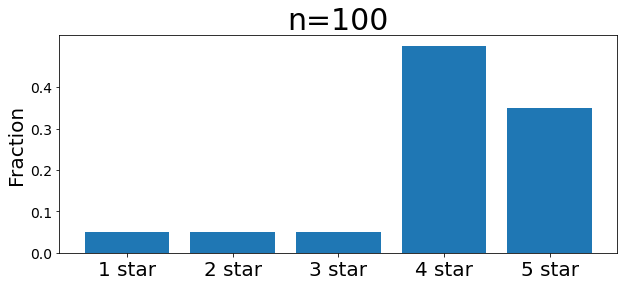

In [4]:
plt.figure(figsize=(10,4))
plt.bar([str(i)+' star' for i in np.arange(1,6)], rating_distr_1)
plt.xticks(np.arange(5),fontsize=20)
plt.yticks(np.arange(0,0.5,.1),fontsize=14)
plt.ylabel('Fraction',fontsize=20)
plt.title('n=%s'%n1,fontsize=30)

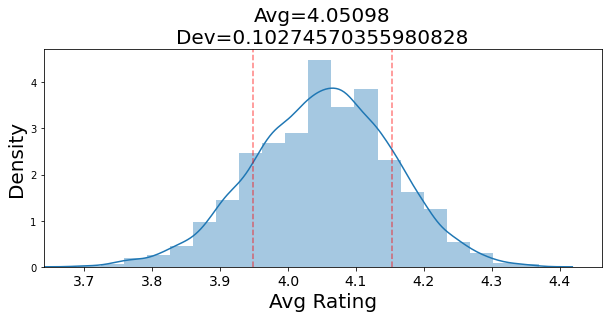

In [5]:
plt.figure(figsize=(10,4))
sns.distplot(small_samp_means,bins=20)
plt.xlabel('Avg Rating',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.xticks(np.arange(0,5.1,.1),fontsize=14)
mu,dev = small_samp_means.mean(),small_samp_means.std()
plt.xlim(mu-4*dev,mu+4*dev)
plt.title('Avg=%s\nDev=%s'%(mu,dev),fontsize=20)
plt.axvline(mu+dev,color='r',linestyle='--',alpha=0.5)
plt.axvline(mu-dev,color='r',linestyle='--',alpha=0.5)
plt.show()

# Large sample (n=1000 and 4 stars)

In [6]:
rating_distr_2 = np.array([.05,.05,.05,.55,.3])
n2 = 1000
large_samp_means = np.array([get_avg_rating(rating_distr_2,n2) for _ in range(10000)])

Text(0.5, 1.0, 'n=1000')

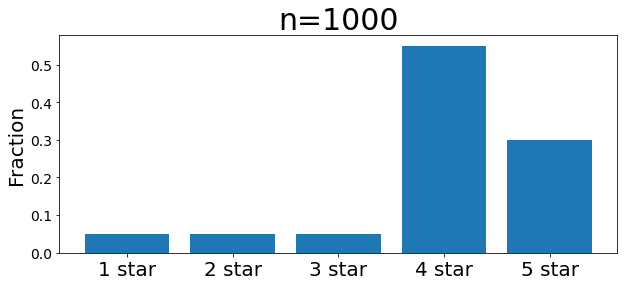

In [7]:
plt.figure(figsize=(10,4))
plt.bar([str(i)+' star' for i in np.arange(1,6)], rating_distr_2)
plt.xticks(np.arange(5),fontsize=20)
plt.yticks(np.arange(0,0.6,.1),fontsize=14)
plt.ylabel('Fraction',fontsize=20)
plt.title('n=%s'%n2,fontsize=30)

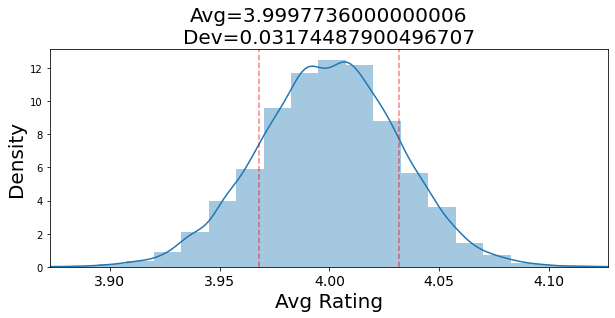

In [8]:
plt.figure(figsize=(10,4))
sns.distplot(large_samp_means,bins=20)
plt.xlabel('Avg Rating',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.xticks(np.arange(0,5.05,.05),fontsize=14)
mu,dev = large_samp_means.mean(),large_samp_means.std()
plt.xlim(mu-4*dev,mu+4*dev)
plt.title('Avg=%s\nDev=%s'%(mu,dev),fontsize=20)
plt.axvline(mu+dev,color='r',linestyle='--',alpha=0.5)
plt.axvline(mu-dev,color='r',linestyle='--',alpha=0.5)
plt.show()

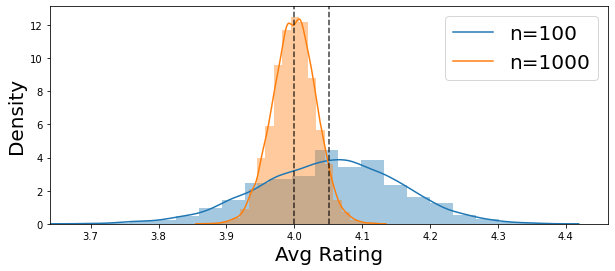

In [9]:
plt.figure(figsize=(10,4))
sns.distplot(small_samp_means,bins=20)
sns.distplot(large_samp_means,bins=20)
plt.xlabel('Avg Rating',fontsize=20)
plt.ylabel('Density',fontsize=20)

mu,dev = small_samp_means.mean(),small_samp_means.std()
plt.xlim(mu-4*dev,mu+4*dev)
plt.legend(['n=%s'%n1,'n=%s'%n2],fontsize=20)

plt.axvline(small_samp_means.mean(),color='k',alpha=0.75,linestyle='--')
plt.axvline(large_samp_means.mean(),color='k',alpha=0.75,linestyle='--')

plt.show()


Text(0.5, 1.0, 'P(small samp avg > large samp avg) = 0.69')

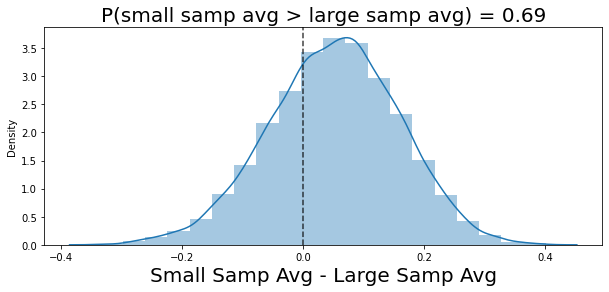

In [10]:
prob_large_samp_greater_small_samp = (small_samp_means > large_samp_means).mean()

plt.figure(figsize=(10,4))
sns.distplot(small_samp_means - large_samp_means,bins=20)
plt.xlabel('Small Samp Avg - Large Samp Avg',fontsize=20)
plt.axvline(0,color='k',alpha=0.75,linestyle='--')
plt.title('P(small samp avg > large samp avg) = %s'%round(prob_large_samp_greater_small_samp,2),fontsize=20)
